# Libraries and Data Information

## Installations

### Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Create Virtual Environment.

In [2]:
#!python -m venv /content/drive/My Drive/my_env  # Store in your Drive

### Activate Environment

In [3]:
!source /content/drive/My Drive/my_env/bin/activate

/bin/bash: line 1: /content/drive/My: No such file or directory


## Install Packages.

In [4]:
!pip install numpy  # Install or upgrade NumPy first
!pip install scipy==1.10.0 # Install scipy specifically version 1.10.0
!pip install scikit-learn  # Install scikit-learn
!pip install tensorflow  # Install TensorFlow
!pip install torch  # Install PyTorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 30.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
cvxpy 1.6.5 requires scipy>=1.11.0, but you have scipy 1.10.0 which is incompatible.
scikit-image 0.25.2 requires sci

In [5]:
!pip install numpy  # Install NumPy first
!pip install numpy.rec # Install numpy.rec specifically.
!pip install scipy==1.10.0 # Reinstall SciPy with the version you need.
#!pip install keras_spiking --upgrade # Install keras_spiking
!pip install keras_spiking # Install keras_spiking
!pip install statsforecast

ERROR: Could not find a version that satisfies the requirement numpy.rec (from versions: none)
ERROR: No matching distribution found for numpy.rec
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.8/285.8 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 9.3 MB/s eta 0:00:00


## Libraries

In [1]:
#matplotlib imports
import matplotlib.pyplot as plt
import matplotlib.pyplot as scatter


from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

# keras/tensorflow imports
import tensorflow as tf
from keras.layers import Dense, Dropout, SimpleRNN, LSTM, GRU, Flatten, Conv1D
from keras.layers import MaxPooling1D, TimeDistributed, GlobalAveragePooling1D
from keras.models import Sequential
import keras_spiking
from keras_spiking import SpikingActivation

# warnings imports
import warnings
warnings.filterwarnings("ignore")

#statsmodels imports
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# statsforecast library
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

# torch imports
import torch
import torch.nn as nn
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"{device}" " is available.")

# Nengo Imports
#import nengo

# Other imports
#from urllib.request import urlretrieve
import collections
import numpy as np
import pandas as pd
from math import sqrt
import os
import pickle
from datetime import datetime, timedelta
from google.colab import drive

cpu is available.


# Load Data

In [2]:
from google.colab import files, runtime
data_to_load = files.upload()

Saving Sunspots.csv to Sunspots.csv


# Read and Check Data

## Preprocessing stage.

In [3]:
filename_list = list(data_to_load.keys())
filename = filename_list[0]

In [4]:
df_entire = pd.read_csv(filename)
df_entire.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [5]:
df_entire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         3265 non-null   int64  
 1   Date                               3265 non-null   object 
 2   Monthly Mean Total Sunspot Number  3265 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 76.7+ KB


In [6]:
title_name = 'Monthly Mean Total Sunspot Number, from 1749/01/01 to 2017/08/31'

## Other Pre-Processing Information

In [7]:
# We must convert the Datetime column to Datetime format
df_entire['Date'] = pd.to_datetime(df_entire['Date'])

# We index the Datetime column after transformation
df_entire.set_index('Date', inplace=True)
df_entire.head()

,Unnamed: 0,Monthly Mean Total Sunspot Number
Date,,
1749-01-31,0,96.7
1749-02-28,1,104.3
1749-03-31,2,116.7
1749-04-30,3,92.8
1749-05-31,4,141.7


In [8]:
# checking missing data
df_entire.isna().sum()

,0
Unnamed: 0,0
Monthly Mean Total Sunspot Number,0


In [9]:
# Let's look at the years in the data set
years = df_entire.index.year.unique()
years

Index([1749, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758,
       ...
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype='int32', name='Date', length=273)

In [10]:
df_entire = df_entire.drop(columns = ['Unnamed: 0'])
df_entire

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7
...,...
2020-09-30,0.6
2020-10-31,14.4
2020-11-30,34.0


## Plot Vehicle-Miles Traveled, Vehicle-Hours Traveled, Q based on Trends and Seasonality.

In [11]:
def plot_sunspot_num(select_df, start, end, seasonality, title_name, feature):
    plt.figure(figsize=(16, 16))
    plt.plot(select_df[start:end], label=feature)
    plt.locator_params(axis='x', nbins=20)
    plt.locator_params(axis='y', nbins=20)
    plt.rc('xtick', labelsize=20)
    plt.rc('ytick', labelsize=20)
    plt.ylabel(feature, fontsize = 20)
    plt.xlabel("Date", fontsize = 20)
    plt.title("{0} for {1} ({2})".format(feature, title_name, seasonality),
              fontsize = 20)
    plt.show()

### Trend Plot

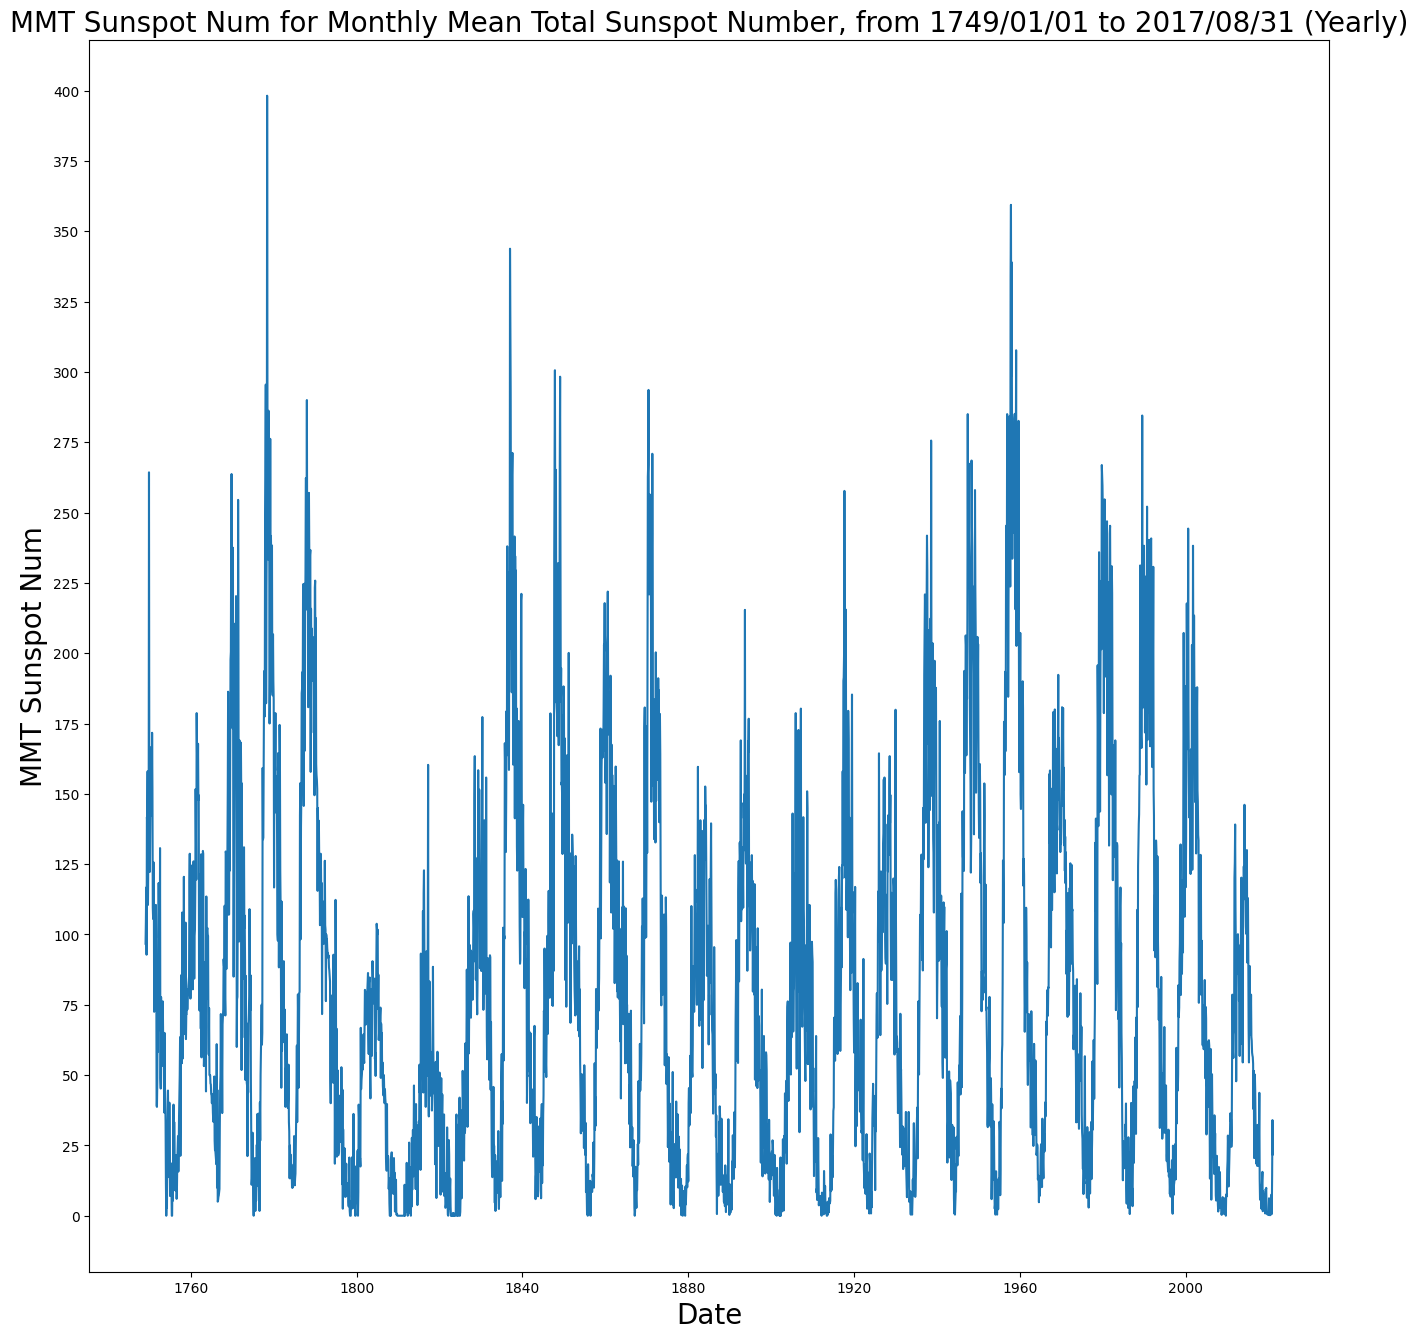

In [12]:
plot_sunspot_num(df_entire, 0, df_entire.shape[0]-1, "Yearly", title_name,
                 'MMT Sunspot Num')

### Seasonality Plot

In [13]:
yearly_df = df_entire.query("Date >= '2001-01-01' \
                       and Date <= '2002-01-01'")
yearly_df

,Monthly Mean Total Sunspot Number
Date,
2001-01-31,142.6
2001-02-28,121.5
2001-03-31,165.8
2001-04-30,161.7
2001-05-31,142.1
2001-06-30,202.9
2001-07-31,123.0
2001-08-31,161.5
2001-09-30,238.2


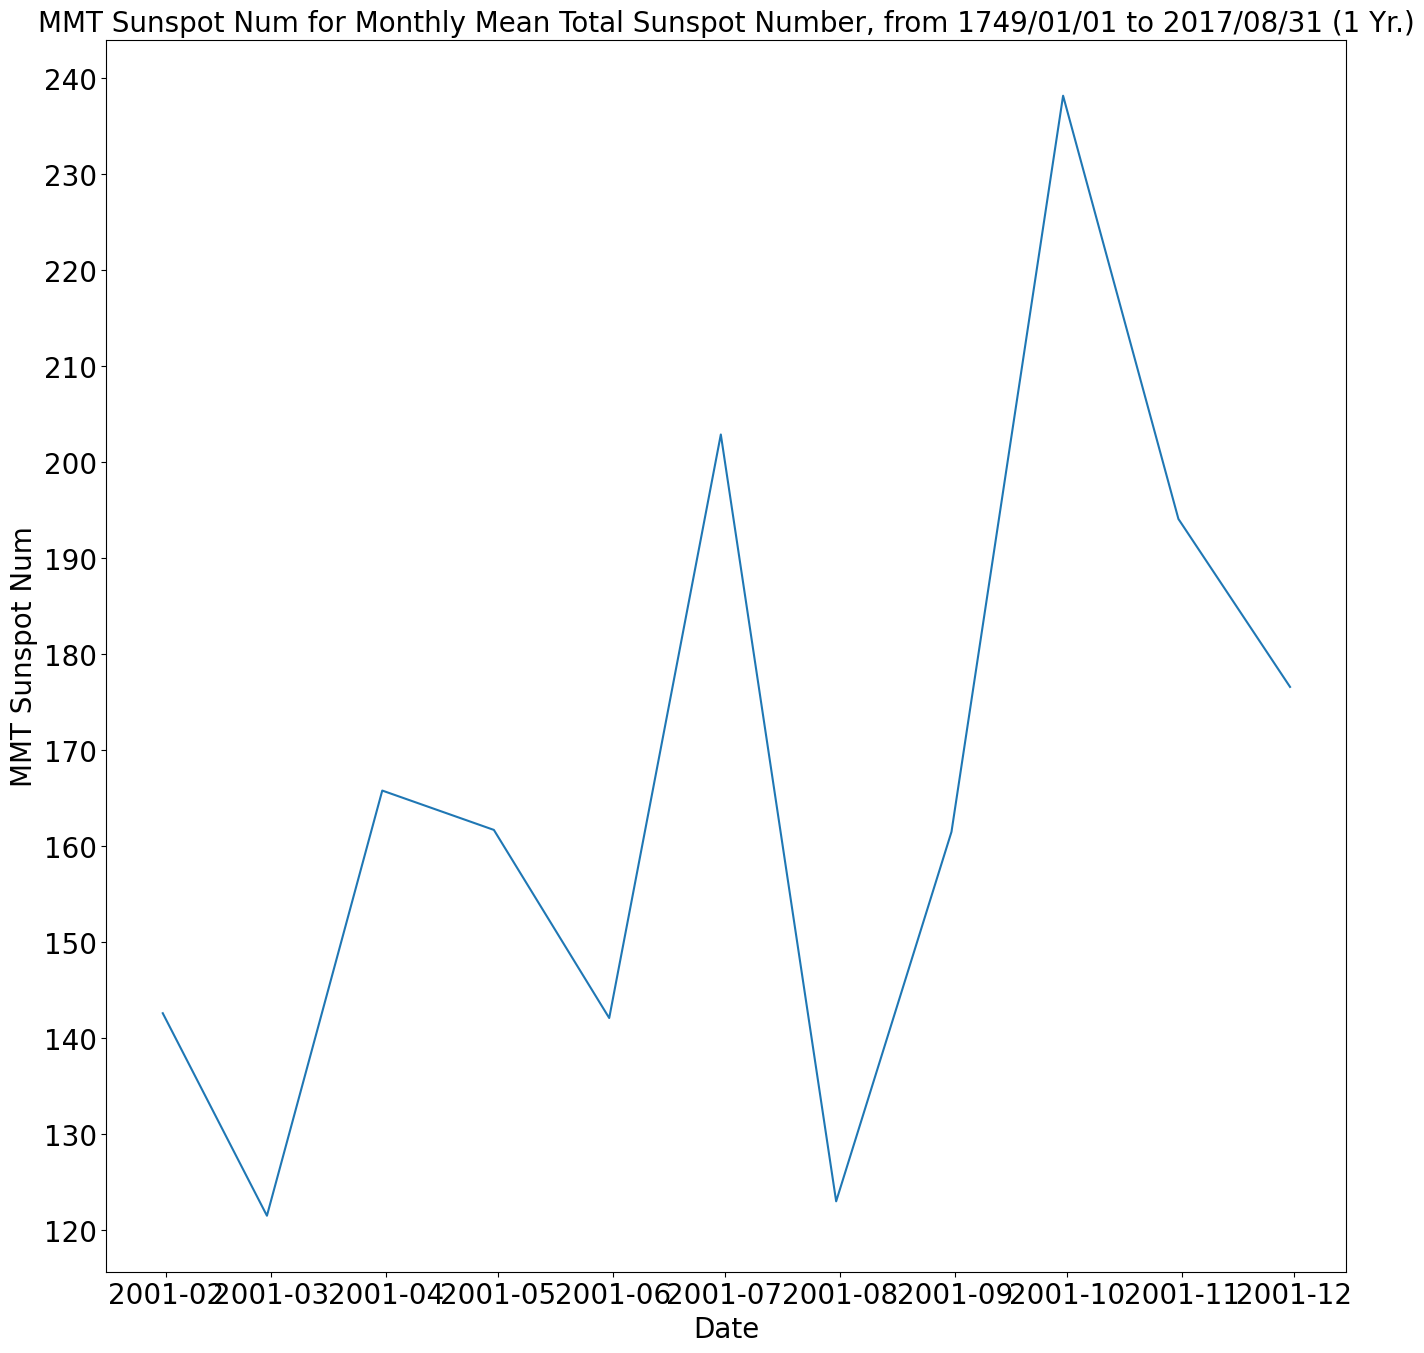

In [14]:
plot_sunspot_num(yearly_df, 0, yearly_df.shape[0]-1, "1 Yr.",
                 title_name, 'MMT Sunspot Num')

# Normalization Process

In [15]:
def get_scaler(scaler):
    scalers = {
        "minmax": MinMaxScaler,
        "standard": StandardScaler,
        "maxabs": MaxAbsScaler,
        "robust": RobustScaler,
    }
    return scalers.get(scaler.lower())()

def normalize_data(df):
    scaler_type = 'minmax'
    #scaler_type = input("Enter a scaler type (minmax,standard, maxabs, robust): ")
    if (scaler_type != 'minmax') and (scaler_type != 'standard') and (scaler_type != 'maxabs') and (scaler_type != 'robust'):
      runtime.unassign()

    scaler = get_scaler(scaler_type)
    normalized_data_MMT = scaler.fit_transform(df['Monthly Mean Total Sunspot Number'].
                                               values.reshape(-1,1))
    df['MMTSN_Norm'] = normalized_data_MMT
    return df, scaler

df_norm, scaler = normalize_data(df_entire)
df_norm_yr, scaler = normalize_data(yearly_df)

In [16]:
df_norm

,Monthly Mean Total Sunspot Number,MMTSN_Norm
Date,,
1749-01-31,96.7,0.242843
1749-02-28,104.3,0.261929
1749-03-31,116.7,0.293069
1749-04-30,92.8,0.233049
1749-05-31,141.7,0.355851
...,...,...
2020-09-30,0.6,0.001507
2020-10-31,14.4,0.036163
2020-11-30,34.0,0.085384


## Plot Monthly Mean Sunspot Number based on Trend and Seasonality.

Now after normalization we can observe that the data range on y-axis is 0.0 - 1.0.

### Yearly Plots (Trend)

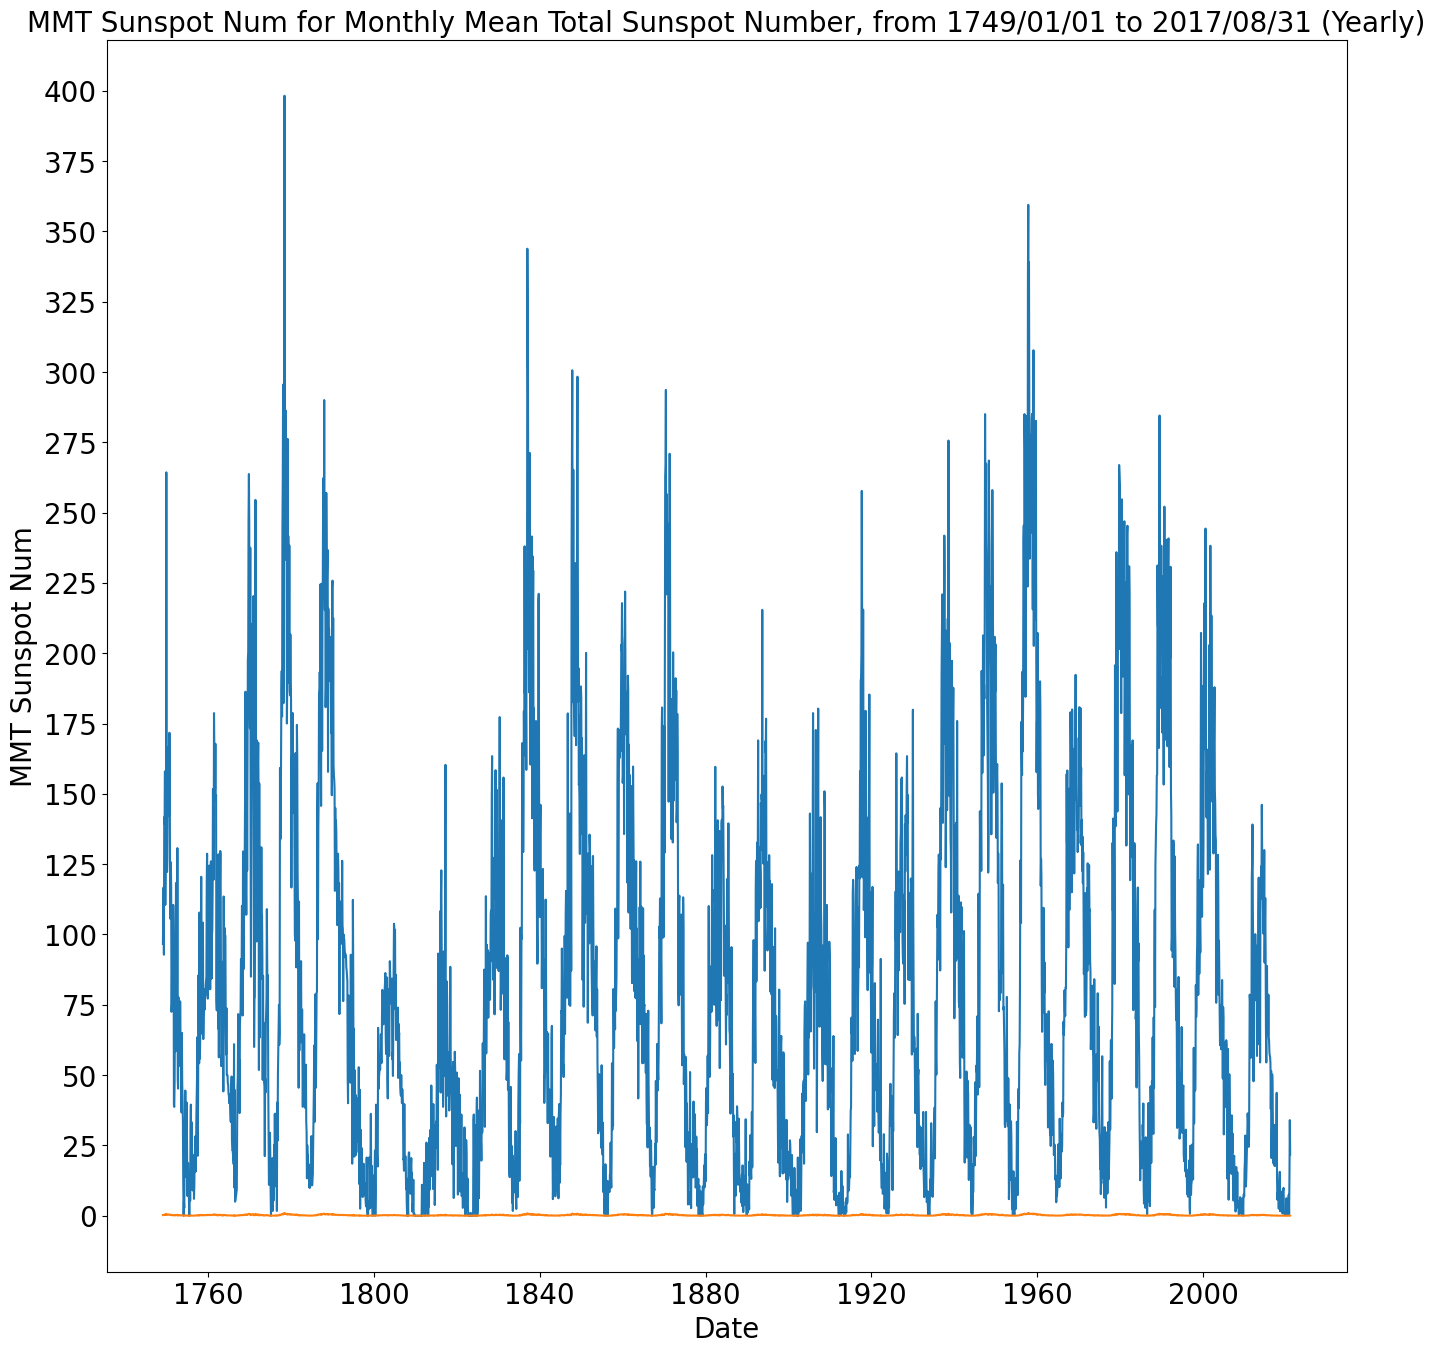

In [17]:
plot_sunspot_num(df_norm, 0, df_entire.shape[0]-1, "Yearly", title_name,
                 'MMT Sunspot Num')

### Daily Plots (Seasonality)

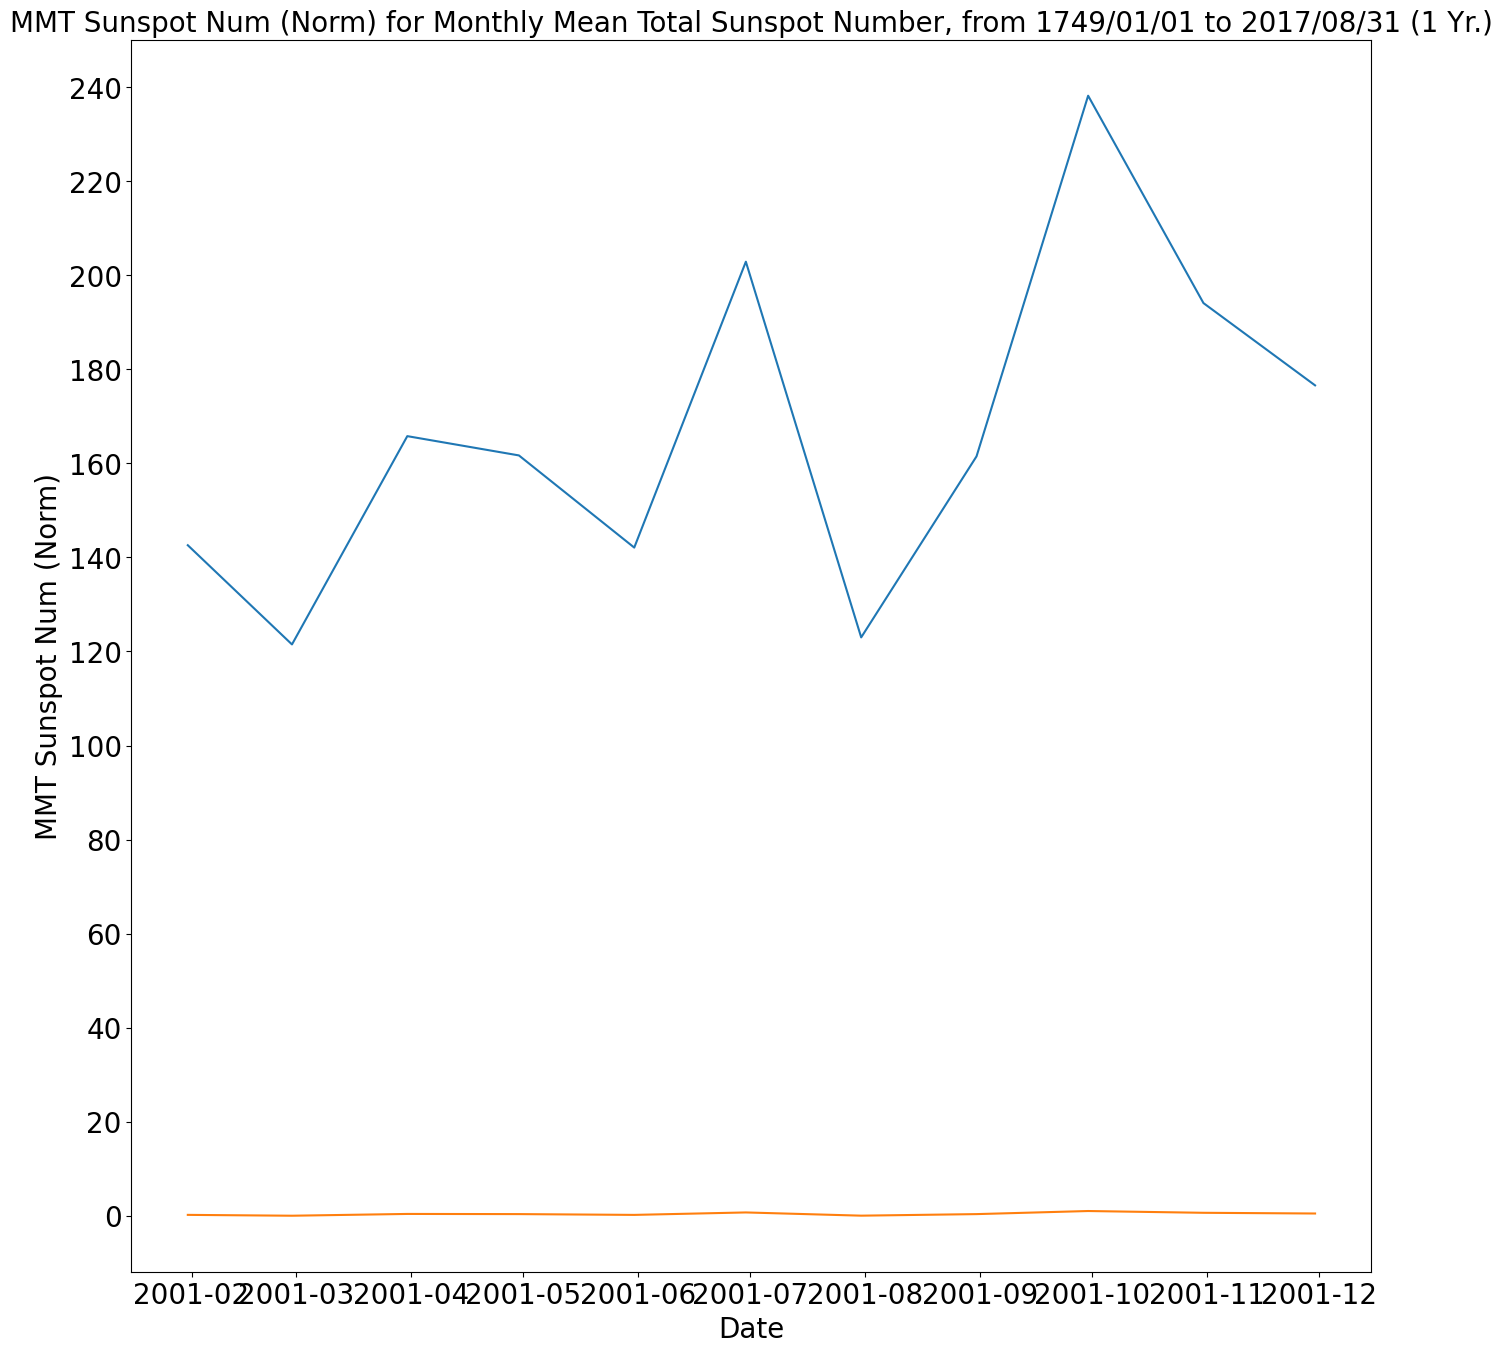

In [18]:
plot_sunspot_num(df_norm_yr, 0, df_norm_yr.shape[0]-1, "1 Yr.",
                 title_name, 'MMT Sunspot Num (Norm)')

# Let's observe train and test data on the graph

## Split into Train/Test Data.

In [19]:
test_size = 0.2 # Set Split rate to 3:1 (80 % Training 20 % Test).
split_pos = int(df_entire.shape[0]*(1 - test_size))
df_entire = df_entire.reset_index()
df_entire

,Date,Monthly Mean Total Sunspot Number,MMTSN_Norm
0,1749-01-31,96.7,0.242843
1,1749-02-28,104.3,0.261929
2,1749-03-31,116.7,0.293069
3,1749-04-30,92.8,0.233049
4,1749-05-31,141.7,0.355851
...,...,...,...
3260,2020-09-30,0.6,0.001507
3261,2020-10-31,14.4,0.036163
3262,2020-11-30,34.0,0.085384
3263,2020-12-31,21.8,0.054746


In [20]:
# 2019-02-06 will be the date seperation. Dates past this will be the test set.
split_date = str(df_entire.Date[split_pos])
#split_date = split_date[:10]
#DOM_train = df_norm.loc[df_norm.index <= split_date].copy()
DOM_train = df_entire.loc[df_norm.index <= split_date].copy()
#DOM_test = df_norm.loc[df_norm.index > split_date].copy()
DOM_test = df_entire.loc[df_norm.index > split_date].copy()
split_date

'1966-09-30 00:00:00'

## Plot Train/Test Split Graphs.

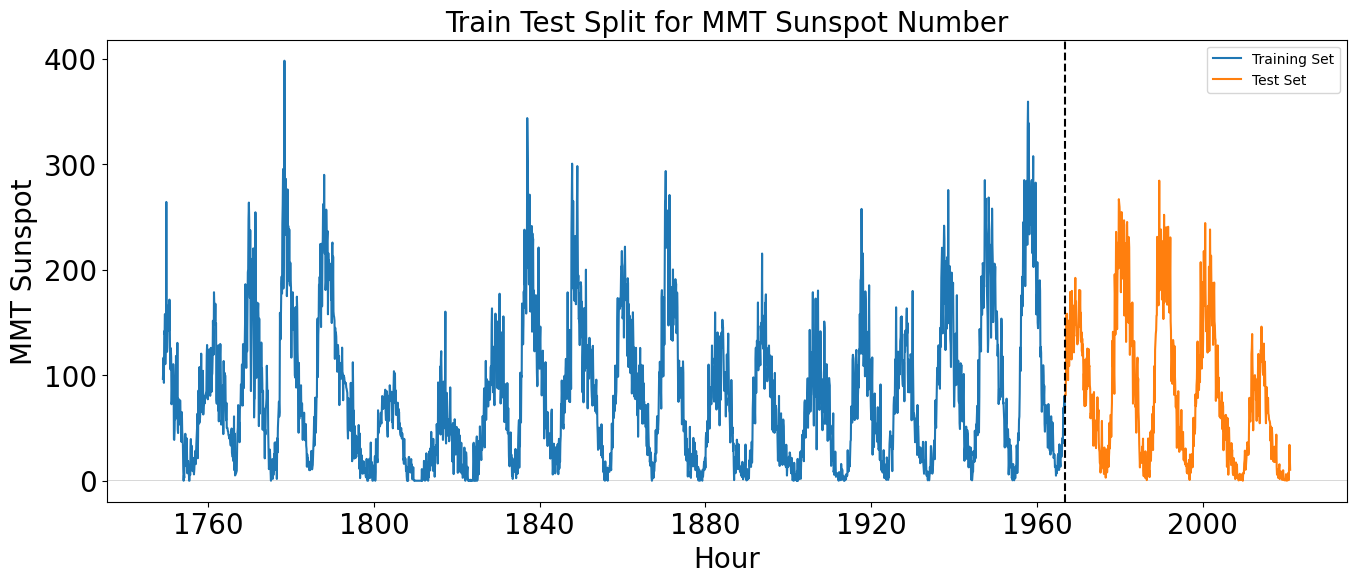

In [21]:
# Monthly Mean Total Sunspot Number Train Test Split
plt.figure(figsize=(16,6))
plt.plot(DOM_train['Date'], DOM_train['Monthly Mean Total Sunspot Number'],
         label='Training Set (Vehicle Miles)')
plt.plot(DOM_test['Date'], DOM_test['Monthly Mean Total Sunspot Number'],
         label='Testing Set (Vehicle Miles)')
plt.axvline(x = df_entire.Date[split_pos], color='black', ls='--')
plt.legend(['Training Set', 'Test Set'])
plt.axhspan(0, 1, facecolor='gray', alpha=0.3)
plt.xlabel("Hour", fontsize = 20)
plt.ylabel("MMT Sunspot", fontsize = 20)
plt.title("Train Test Split for MMT Sunspot Number", fontsize = 20)
plt.show()

In [22]:
# We index the Datetime column after transformation
df_entire.set_index('Date', inplace=True)
df_entire.head()

,Monthly Mean Total Sunspot Number,MMTSN_Norm
Date,,
1749-01-31,96.7,0.242843
1749-02-28,104.3,0.261929
1749-03-31,116.7,0.293069
1749-04-30,92.8,0.233049
1749-05-31,141.7,0.355851


In [23]:
df_entire1 = df_entire.drop(columns = ['MMTSN_Norm'])
df_entire1

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7
...,...
2020-09-30,0.6
2020-10-31,14.4
2020-11-30,34.0


In [24]:
df_entire2 = df_entire.drop(columns = ['Monthly Mean Total Sunspot Number'])
df_entire2

,MMTSN_Norm
Date,
1749-01-31,0.242843
1749-02-28,0.261929
1749-03-31,0.293069
1749-04-30,0.233049
1749-05-31,0.355851
...,...
2020-09-30,0.001507
2020-10-31,0.036163
2020-11-30,0.085384


# ARIMA Modeling.

In [25]:
df_copy = df_norm.copy()
df_copy

,Monthly Mean Total Sunspot Number,MMTSN_Norm
Date,,
1749-01-31,96.7,0.242843
1749-02-28,104.3,0.261929
1749-03-31,116.7,0.293069
1749-04-30,92.8,0.233049
1749-05-31,141.7,0.355851
...,...,...
2020-09-30,0.6,0.001507
2020-10-31,14.4,0.036163
2020-11-30,34.0,0.085384


# Decomposition (Additive and Multiplicative).

## Additive Decomposition

<Figure size 1200x800 with 0 Axes>

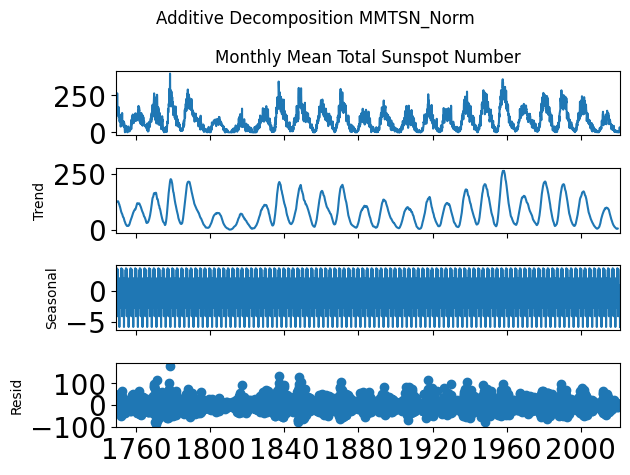

In [26]:
def additive_decomp(df_feature, feature):
  additive_dec_df = seasonal_decompose(df_feature, model='additive', period=30)
  plt.figure(figsize=(12,8))
  additive_dec_df.plot()
  plt.suptitle('Additive Decomposition {0}'.format(feature), fontsize=12)
  plt.tight_layout()
  plt.show()

additive_decomp(df_copy['Monthly Mean Total Sunspot Number'], 'MMTSN_Norm')

## Multiplicative Decomposition

In [27]:
'''def mult_decomp(df_feature, feature):
    mult_dec_df = seasonal_decompose(df_feature, model='multiplicative',
                                      period=30)
    plt.figure(figsize=(12,8))
    mult_dec_df.plot()
    plt.suptitle('Multiplicative Decomposition {0}'.format(feature),
                 fontsize=12)
    plt.tight_layout()
    plt.show()

mult_decomp(df_copy['Monthly Mean Total Sunspot Number'], 'MMTSN_Norm')'''

"def mult_decomp(df_feature, feature):\n    mult_dec_df = seasonal_decompose(df_feature, model='multiplicative',\n                                      period=30)\n    plt.figure(figsize=(12,8))\n    mult_dec_df.plot()\n    plt.suptitle('Multiplicative Decomposition {0}'.format(feature),\n                 fontsize=12)\n    plt.tight_layout()\n    plt.show()\n\nmult_decomp(df_copy['Monthly Mean Total Sunspot Number'], 'MMTSN_Norm')"

# Dickey Fuller Test.

H0: time series data is non-stationary

H1: time series data is stationary

p-value < 0.05 -> reject null hypothesis (H0)

In [28]:
result_adfuller = adfuller(df_copy['MMTSN_Norm'], autolag='AIC')
print(f'ADF Statistic: {result_adfuller[0]}')
print(f'p-value: {result_adfuller[1]}')

ADF Statistic: -10.49705166254614
p-value: 1.10855249219565e-18


# KPSS Test

H0: time series data is stationary

H1: time series data is non-stationary

p-value < 0.05 -> reject null hypothesis (H0)

In [32]:
result_kpss = kpss(df_copy['MMTSN_Norm'])
print(f'KPSS Statistic: {result_kpss[0]}')
print(f'p-value: {result_kpss[1]}')

KPSS Statistic: 0.10380476041797887
p-value: 0.1


<ipython-input-32-0f77dfebf68d>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(df_copy['MMTSN_Norm'])


# Rolling Test

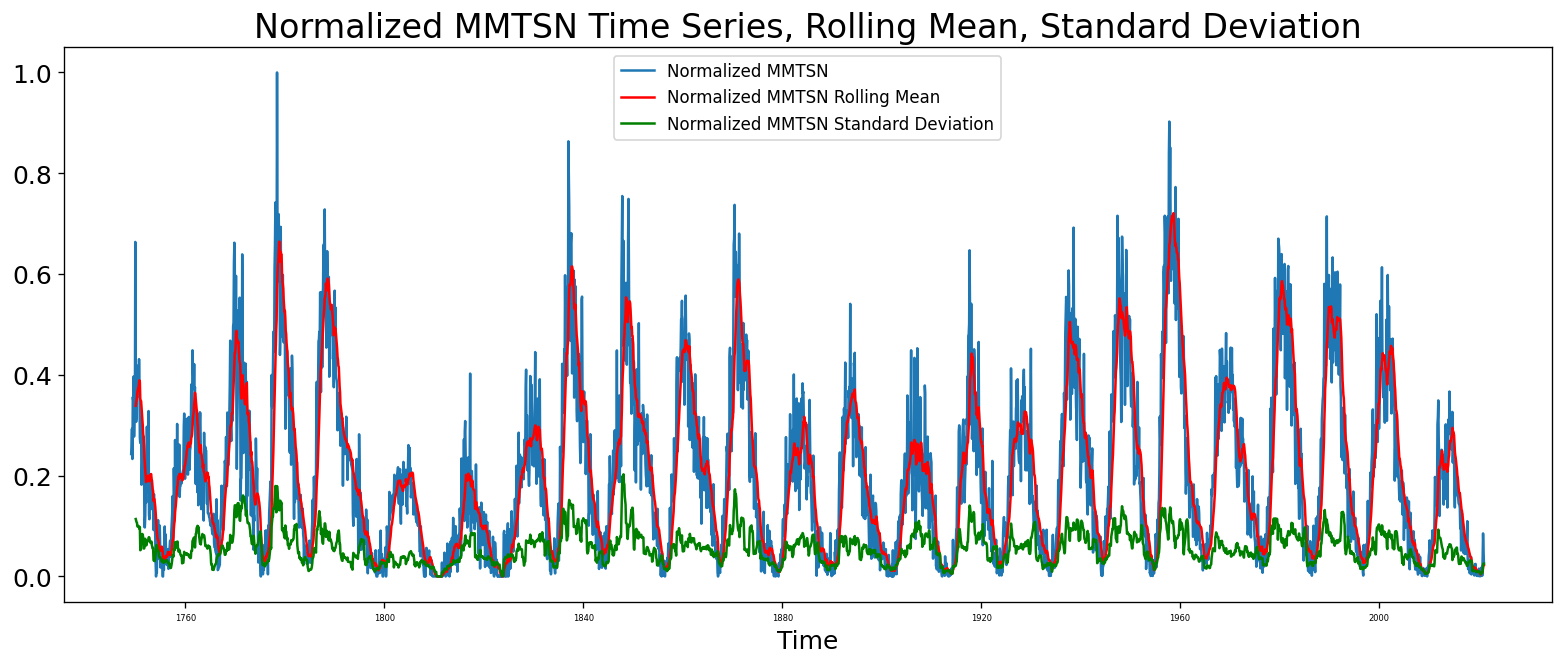

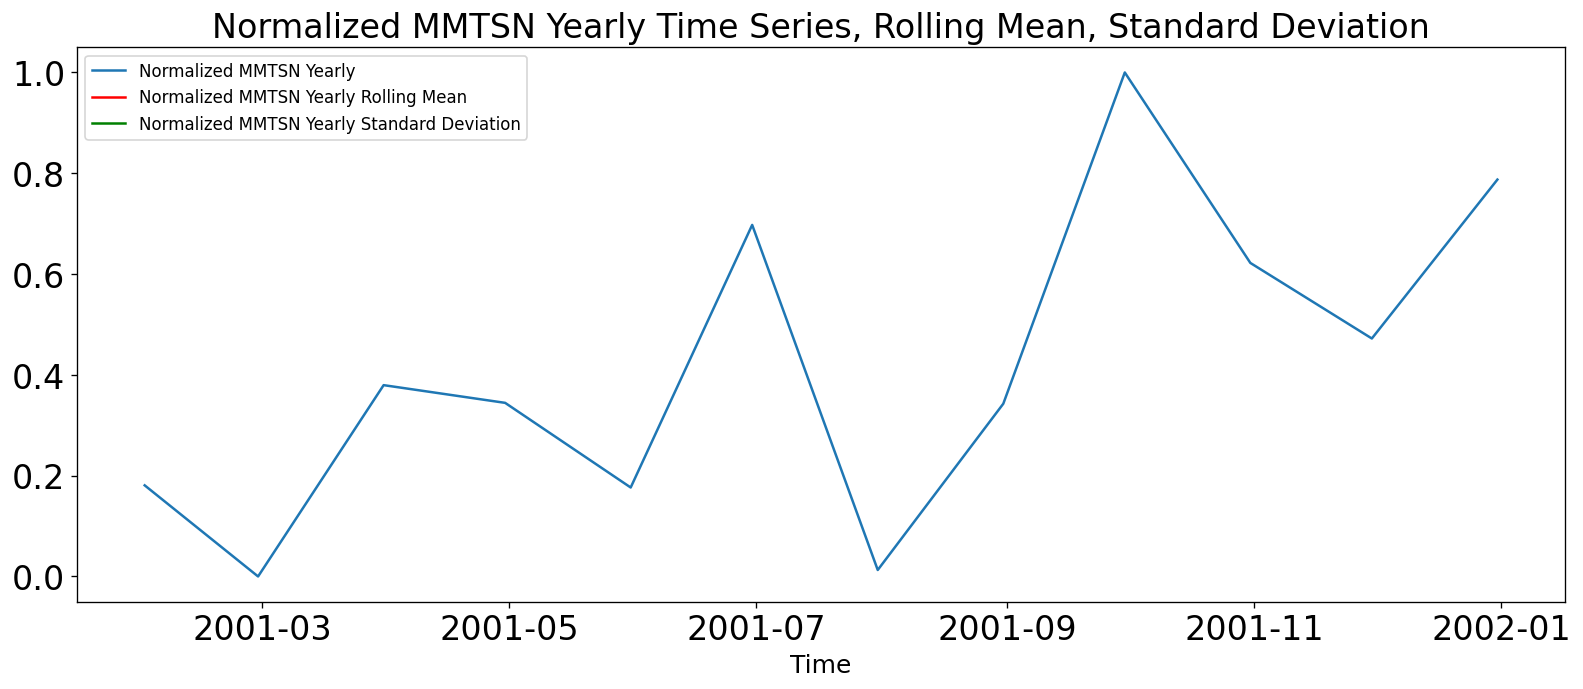

In [33]:
def rolling_test(selected_df, feature):
  rolling_mean = selected_df.rolling(12).mean()
  rolling_std =  selected_df.rolling(12).std()
  plt.figure(figsize=(16,6))
  plt.plot(selected_df, label=feature)
  plt.plot(rolling_mean, color="red",
          label="{0} Rolling Mean".format(feature))
  plt.plot(rolling_std, color="green",
          label="{0} Standard Deviation".format(feature))
  plt.xlabel('Time', fontsize = 15)
  plt.rc('xtick', labelsize=20)
  plt.rc('ytick', labelsize=20)
  plt.locator_params(axis='x', nbins=10)
  plt.locator_params(axis='y', nbins=10)
  plt.title("{0} Time Series, Rolling Mean, Standard Deviation".format(feature),
            fontsize = 20)
  plt.legend(loc='best')
  plt.show()

# Trend Rolling Test
rolling_test(df_copy['MMTSN_Norm'],'Normalized MMTSN')
# For One Year.
rolling_test(yearly_df['MMTSN_Norm'],'Normalized MMTSN Yearly')

# ARIMA Model Parameter Setup

## ARIMA d Parameter

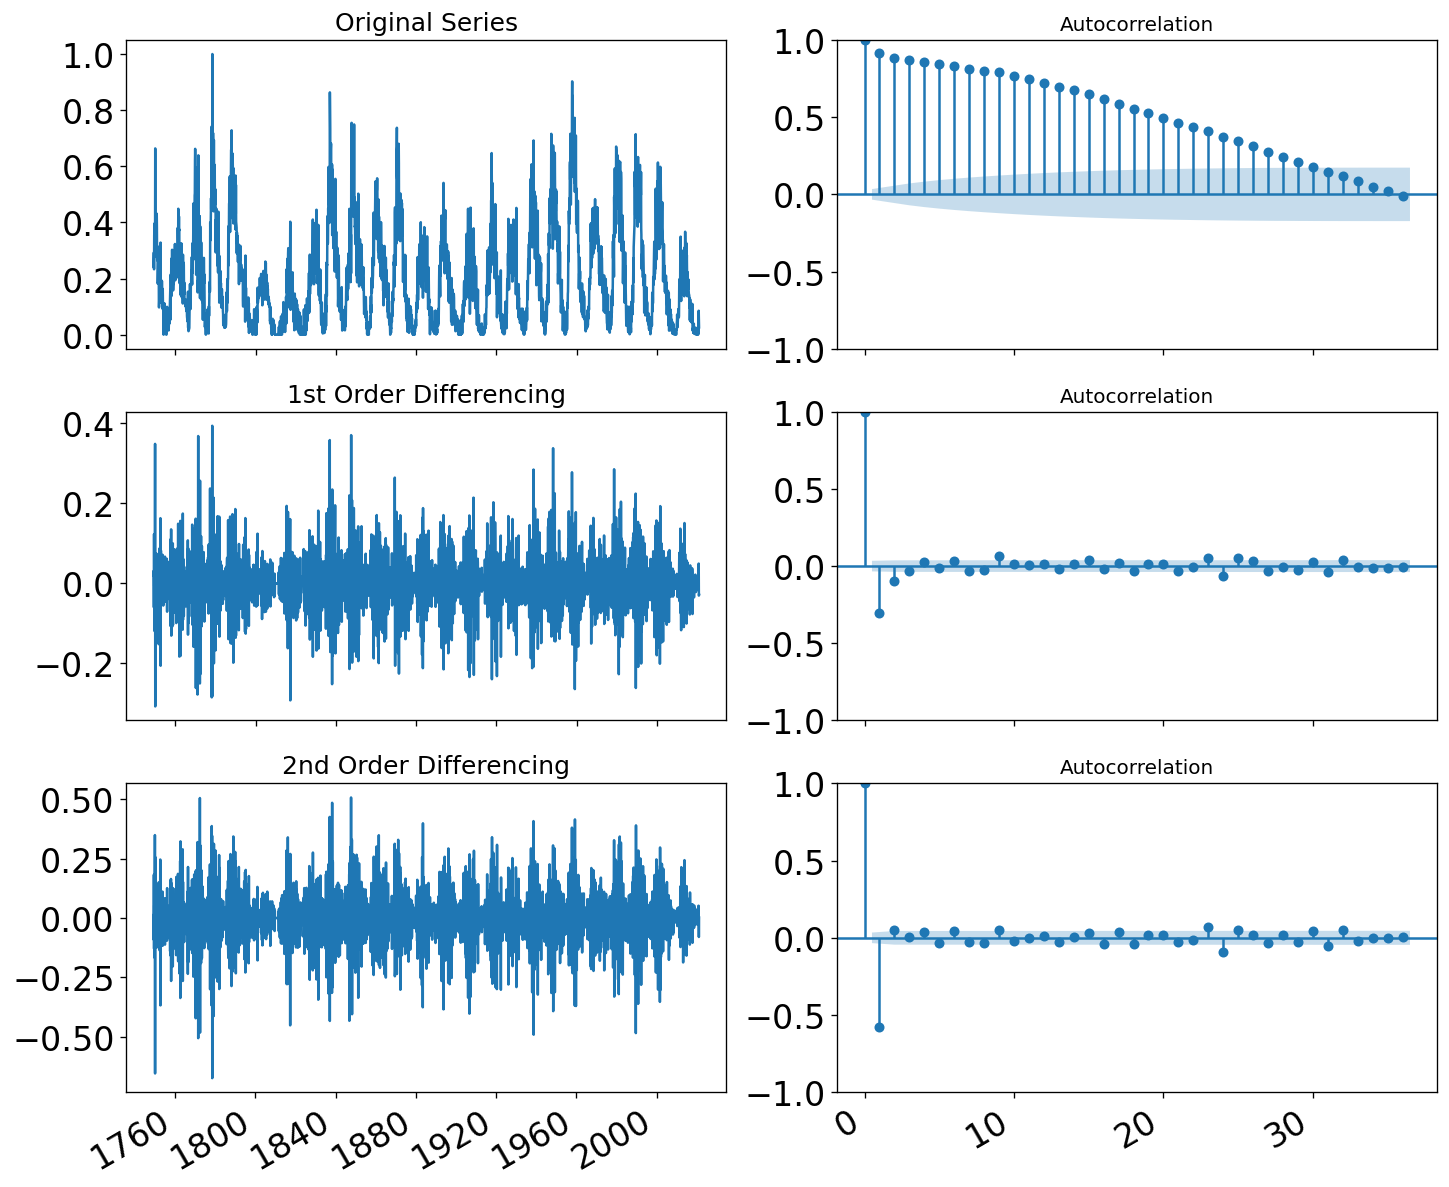

In [34]:
plt.rcParams.update({'figure.figsize':(12,10), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=False)
#axes[0, 0].plot(df_copy['Monthly Mean Total Sunspot Number'])
axes[0, 0].plot(df_copy['MMTSN_Norm'])

axes[0, 0].set_title('Original Series', fontsize = 15)
#plot_acf(df_copy['Monthly Mean Total Sunspot Number'].values, ax=axes[0, 1])
plot_acf(df_copy['MMTSN_Norm'].values, ax=axes[0, 1])
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.locator_params(axis='x', nbins=5)
#plt.locator_params(axis='y', nbins=5)

# 1st Differencing
#axes[1, 0].plot(df_copy['Monthly Mean Total Sunspot Number'].diff())
axes[1, 0].plot(df_copy['MMTSN_Norm'].diff())
axes[1, 0].set_title('1st Order Differencing', fontsize = 15)
#plot_acf(df_copy['Monthly Mean Total Sunspot Number'].diff().dropna(), ax=axes[1, 1])
plot_acf(df_copy['MMTSN_Norm'].diff().dropna(), ax=axes[1, 1])
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.locator_params(axis='x', nbins=5)
#plt.locator_params(axis='y', nbins=5)

# 2nd Differencing
#axes[2, 0].plot(df_copy['Monthly Mean Total Sunspot Number'].diff().diff())
axes[2, 0].plot(df_copy['MMTSN_Norm'].diff().diff())
axes[2, 0].set_title('2nd Order Differencing', fontsize = 15)
#plot_acf(df_copy['Monthly Mean Total Sunspot Number'].diff().diff().dropna(), ax=axes[2, 1])
plot_acf(df_copy['MMTSN_Norm'].diff().diff().dropna(), ax=axes[2, 1])
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.locator_params(axis='x', nbins=5)
#plt.locator_params(axis='y', nbins=5)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

## AR Term (p)

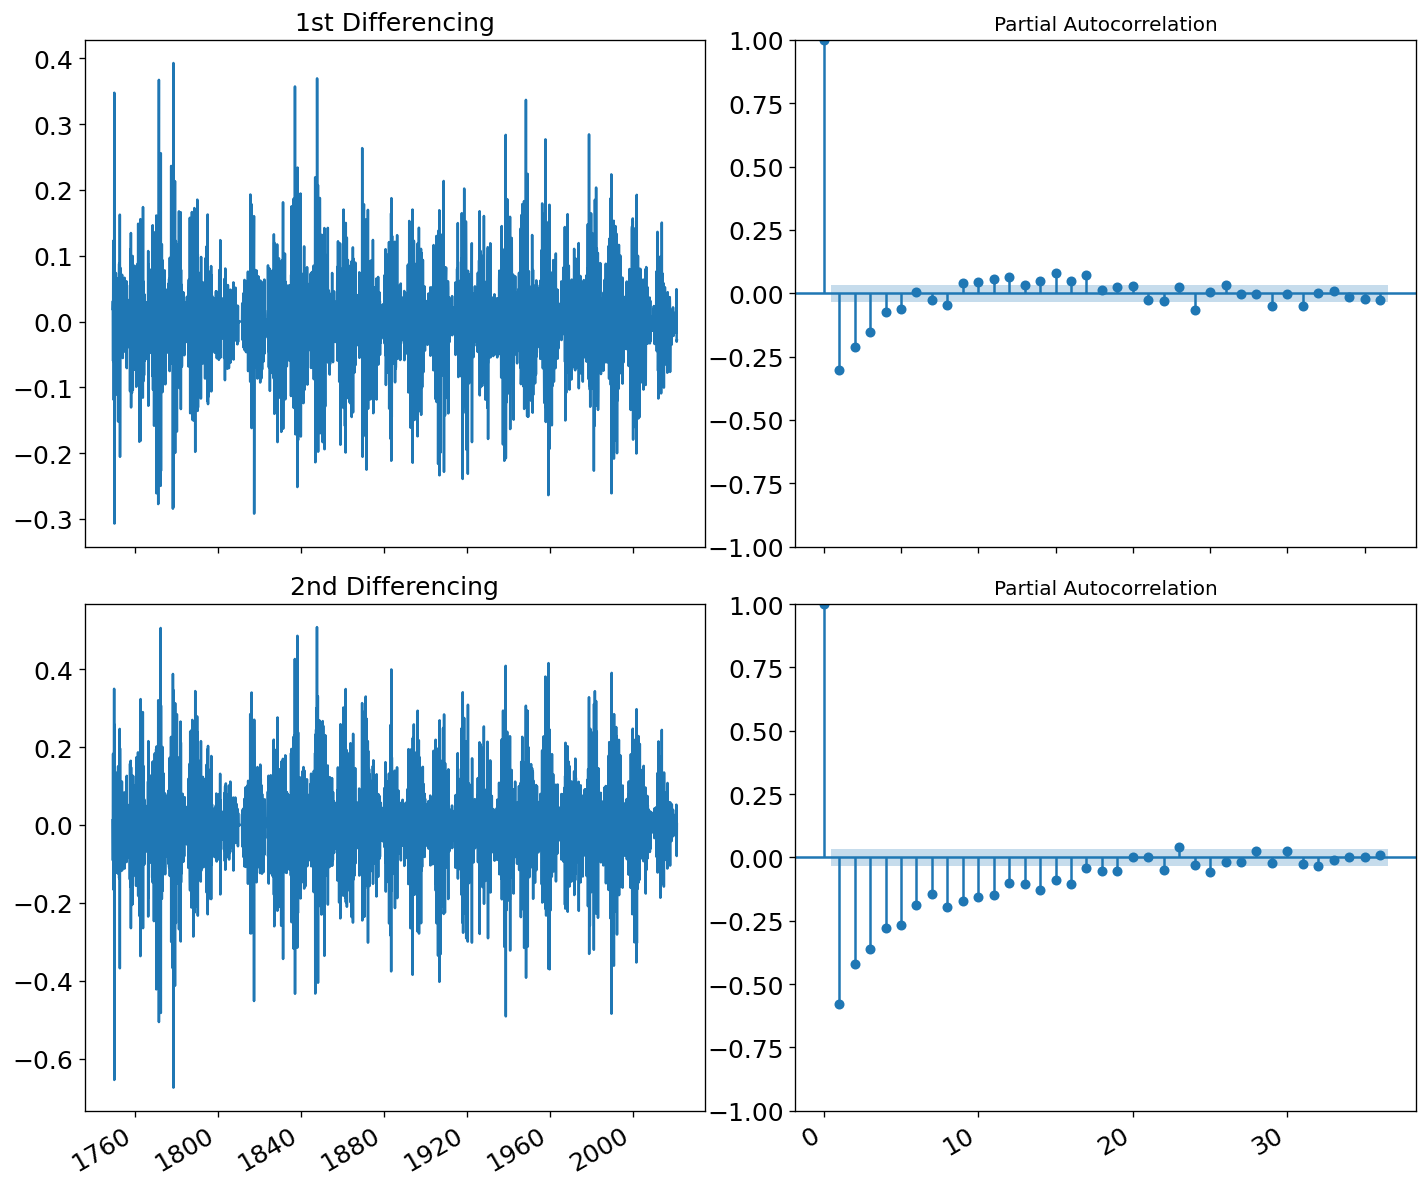

In [35]:
plt.rcParams.update({'figure.figsize':(12,10), 'figure.dpi':120})

fig, axes = plt.subplots(2, 2, sharex=False)

# PACF plot of 1st differenced series
#axes[0,0].plot(df_copy['Monthly Mean Total Sunspot Number'].diff())
axes[0,0].plot(df_copy['MMTSN_Norm'].diff())

axes[0,0].set_title('1st Differencing', fontsize = 15)
axes[0,1].set(ylim=(0,5))
#plot_pacf(df_copy['Monthly Mean Total Sunspot Number'].diff().dropna(), ax=axes[1,1])
plot_pacf(df_copy['MMTSN_Norm'].diff().dropna(), ax=axes[0,1])
plt.rc('xtick', labelsize=10)
#plt.rc('ytick', labelsize=10)
plt.locator_params(axis='x', nbins=5)
#plt.locator_params(axis='y', nbins=5)

# PACF plot of 2nd differenced series
#axes[1,0].plot(df_copy['Monthly Mean Total Sunspot Number'].diff().diff())
axes[1,0].plot(df_copy['MMTSN_Norm'].diff().diff())
axes[1,0].set_title('2nd Differencing', fontsize = 15)
axes[1,1].set(ylim=(0,5))
plot_pacf(df_copy['MMTSN_Norm'].diff().diff().dropna(),
          ax=axes[1,1])
plt.rc('xtick', labelsize=10)
#plt.rc('ytick', labelsize=10)
plt.locator_params(axis='x', nbins=5)
#plt.locator_params(axis='y', nbins=5)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

## MA Term (q)

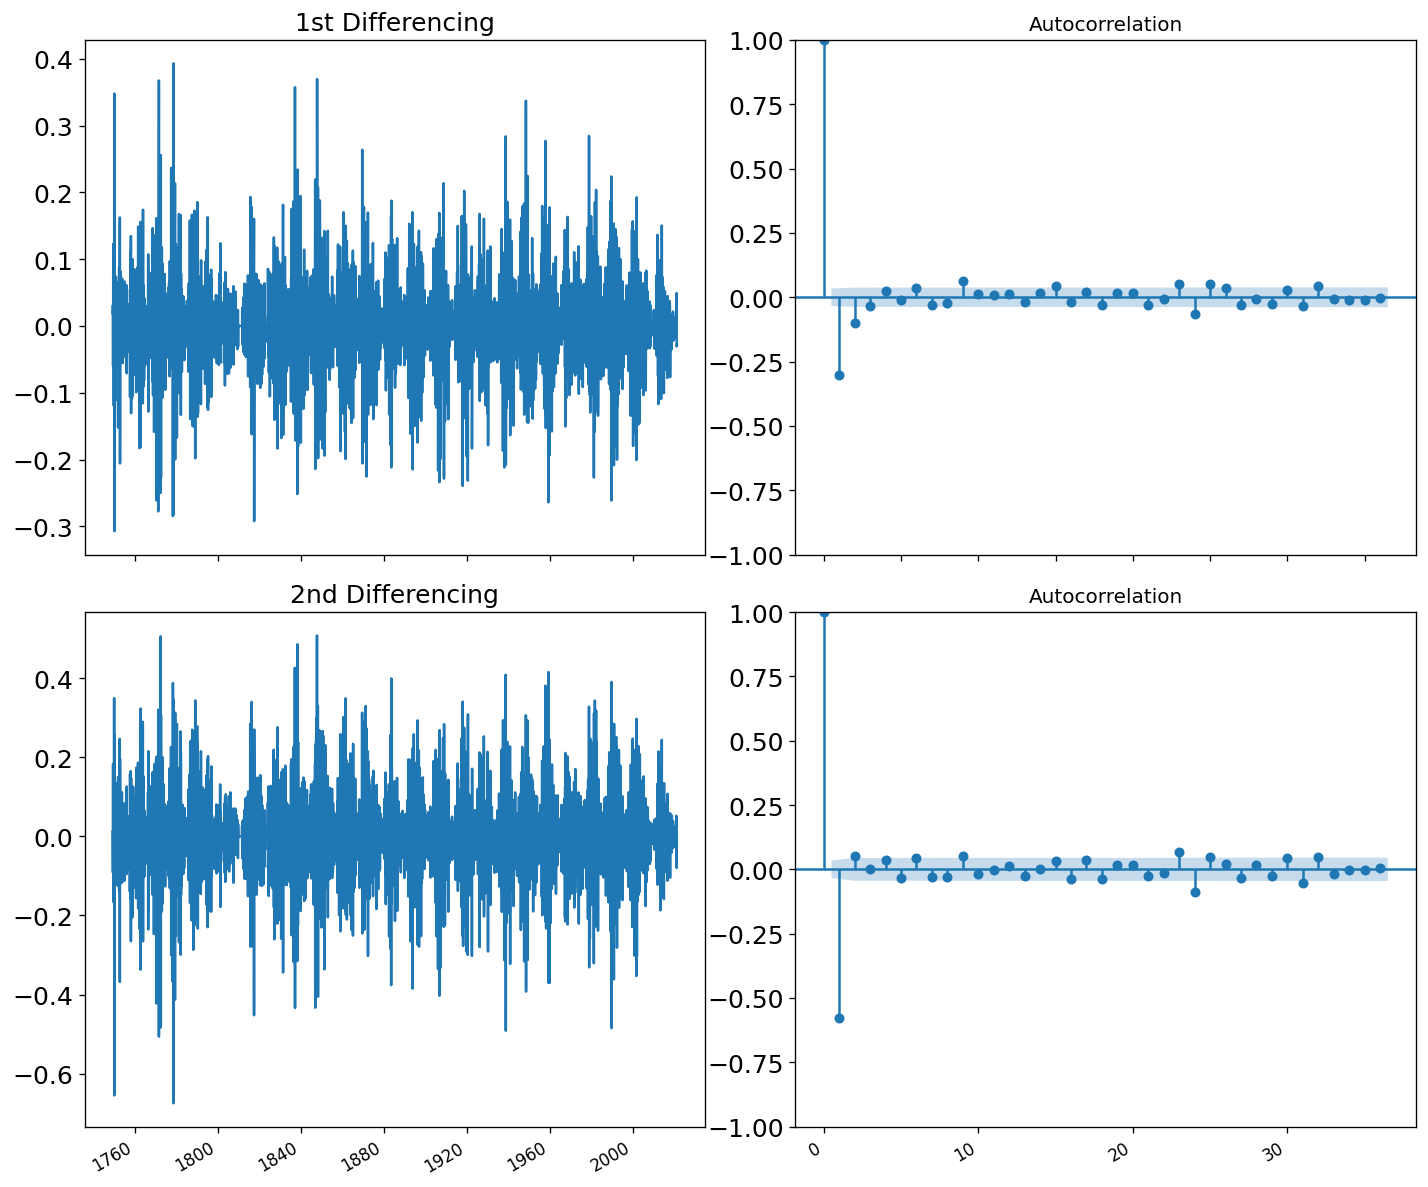

In [36]:
plt.rcParams.update({'figure.figsize':(12,10), 'figure.dpi':120})

fig, axes = plt.subplots(2, 2, sharex=False)

# ACF plot of 1st differenced series
#axes[0,0].plot(df_copy['Monthly Mean Total Sunspot Number'].diff())
axes[0,0].plot(df_copy['MMTSN_Norm'].diff())


axes[0,0].set_title('1st Differencing', fontsize = 15)
axes[0,1].set(ylim=(0,5))
#plot_acf(df_copy['Monthly Mean Total Sunspot Number'].diff().dropna(), ax=axes[0,1])
plot_acf(df_copy['MMTSN_Norm'].diff().dropna(), ax=axes[0,1])
plt.rc('xtick', labelsize=10)
#plt.rc('ytick', labelsize=10)
plt.locator_params(axis='x', nbins=5)
#plt.locator_params(axis='y', nbins=5)

# ACF plot of 2nd differenced series
#axes[1,0].plot(df_copy['Monthly Mean Total Sunspot Number'].diff().diff())
axes[1,0].plot(df_copy['MMTSN_Norm'].diff().diff())
axes[1,0].set_title('2nd Differencing', fontsize = 15)
axes[1,1].set(ylim=(0,5))
#plot_acf(df_copy['Monthly Mean Total Sunspot Number'].diff().diff().dropna(), ax=axes[1,1])
plot_acf(df_copy['MMTSN_Norm'].diff().diff().dropna(), ax=axes[1,1])
plt.rc('xtick', labelsize=5)
#plt.rc('ytick', labelsize=10)
plt.locator_params(axis='x', nbins=5)
#plt.locator_params(axis='y', nbins=5)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

# ARIMA Model

Portions of the remaining code inspired from https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/.

## Essential Variables

In [ ]:
#Feature = 'VHT (Veh-Hours)'
Feature = 'MMTSN_Norm'
series = df_copy[Feature]
#series = selected_df[feature]
#series.index = df_copy[feature_norm].index
series.index = df_copy[Feature].index
# split into train and test sets
X = series.values
size = int(len(X) * 0.8)
train_v1, test_v1 = X[0:size], X[size:len(X)]
history = [x for x in train_v1]
predictions = list()

## Creating and Training Model.

In [ ]:
# Re-train ARIMA
#model = ARIMA(selected_df[feature_norm], order=(p, d, q))
model = ARIMA(df_copy[Feature], order=(0, 0, 0))
Ar = model.fit()

# Forecast
fc = Ar.get_forecast(test_v1.shape[0]).summary_frame()
# fc_conf_int = fc.conf_int(alpha=0.05)
fc = pd.DataFrame(fc).rename({'mean':'#{0}'.format(Feature)},axis=1)
fc

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


MMTSN_Norm,#MMTSN_Norm,mean_se,mean_ci_lower,mean_ci_upper
2021-02-28,0.205366,0.170469,-0.128748,0.53948
2021-03-31,0.205366,0.170469,-0.128748,0.53948
2021-04-30,0.205366,0.170469,-0.128748,0.53948
2021-05-31,0.205366,0.170469,-0.128748,0.53948
2021-06-30,0.205366,0.170469,-0.128748,0.53948
...,...,...,...,...
2075-02-28,0.205366,0.170469,-0.128748,0.53948
2075-03-31,0.205366,0.170469,-0.128748,0.53948
2075-04-30,0.205366,0.170469,-0.128748,0.53948
2075-05-31,0.205366,0.170469,-0.128748,0.53948


In [ ]:
# walk-forward validation
for t in range(len(test_v1)):
    #if (t % 100) == 0:
    print("t: ", t)
    model = ARIMA(history, order=(0,0,0))
    warnings.simplefilter('ignore', ConvergenceWarning)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_v1[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))

t:  0
t:  1
t:  2
t:  3
t:  4
t:  5
t:  6
t:  7
t:  8
t:  9
t:  10
t:  11
t:  12
t:  13
t:  14
t:  15
t:  16
t:  17
t:  18
t:  19
t:  20
t:  21
t:  22
t:  23
t:  24
t:  25
t:  26
t:  27
t:  28
t:  29
t:  30
t:  31
t:  32
t:  33
t:  34
t:  35
t:  36
t:  37
t:  38
t:  39
t:  40
t:  41
t:  42
t:  43
t:  44
t:  45
t:  46
t:  47
t:  48
t:  49
t:  50
t:  51
t:  52
t:  53
t:  54
t:  55
t:  56
t:  57
t:  58
t:  59
t:  60
t:  61
t:  62
t:  63
t:  64
t:  65
t:  66
t:  67
t:  68
t:  69
t:  70
t:  71
t:  72
t:  73
t:  74
t:  75
t:  76
t:  77
t:  78
t:  79
t:  80
t:  81
t:  82
t:  83
t:  84
t:  85
t:  86
t:  87
t:  88
t:  89
t:  90
t:  91
t:  92
t:  93
t:  94
t:  95
t:  96
t:  97
t:  98
t:  99
t:  100
t:  101
t:  102
t:  103
t:  104
t:  105
t:  106
t:  107
t:  108
t:  109
t:  110
t:  111
t:  112
t:  113
t:  114
t:  115
t:  116
t:  117
t:  118
t:  119
t:  120
t:  121
t:  122
t:  123
t:  124
t:  125
t:  126
t:  127
t:  128
t:  129
t:  130
t:  131
t:  132
t:  133
t:  134
t:  135
t:  136
t:  137
t:  13

## Evaluation

In [ ]:
arima_mae_v1 = mean_absolute_error(test_v1,predictions)
print("MAE of ARIMA Statistical model = ", arima_mae_v1)
arima_rmse_v1 =  mean_squared_error(test_v1, predictions) ** 0.5
print("RMSE of ARIMA Statistical model = ",arima_rmse_v1)
#arima_r2_v1 = r2_score(test_v1, predictions)
#print("R^2 Score of ARIMA Statistical model = ",arima_r2_v1)
arima_mape_v1 = 100*mean_absolute_percentage_error(test_v1, predictions)
print("MAPE Score of ARIMA Statistical model = {0} %".format(arima_mape_v1))

MAE of ARIMA Statistical model =  0.14711102218574
RMSE of ARIMA Statistical model =  0.174533605191337
MAPE Score of ARIMA Statistical model = 144218197304989.72 %


## Residual Plots

In [ ]:
selected_df = df_copy.reset_index()
selected_df

,Date,Monthly Mean Total Sunspot Number,MMTSN_Norm
0,1749-01-31,96.7,0.242843
1,1749-02-28,104.3,0.261929
2,1749-03-31,116.7,0.293069
3,1749-04-30,92.8,0.233049
4,1749-05-31,141.7,0.355851
...,...,...,...
3260,2020-09-30,0.6,0.001507
3261,2020-10-31,14.4,0.036163
3262,2020-11-30,34.0,0.085384
3263,2020-12-31,21.8,0.054746


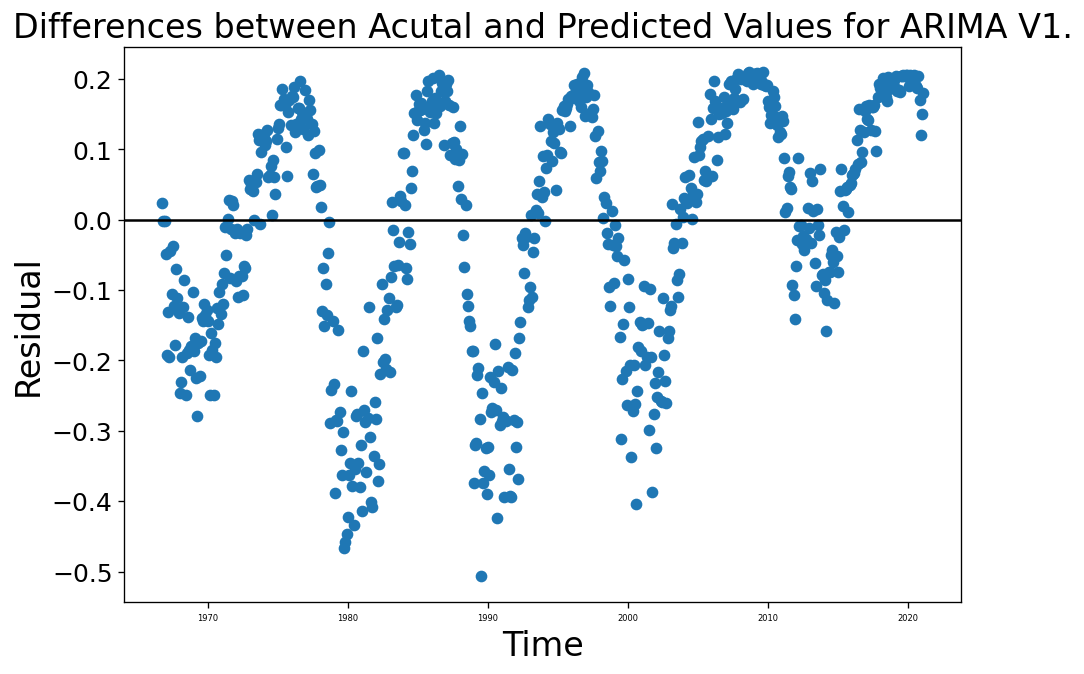

In [ ]:
residual_ARIMA_v1 = np.array(predictions) - test_v1
plt.scatter(selected_df['Date'][size:], residual_ARIMA_v1)
plt.axhline(y=0, color = 'black')
plt.title("Differences between Acutal and Predicted Values for ARIMA V1.",
          fontsize = 20)
plt.xlabel("Time", fontsize = 20)
plt.ylabel("Residual", fontsize = 20)
plt.show()

# AutoARIMA Model

The model was trained using https://medium.com/analytics-vidhya/assessment-of-accuracy-metrics-for-time-series-forecasting-bc115b655705

In [ ]:
input_df = pd.DataFrame({'unique_id': [1.0]*selected_df.shape[0],
                         'ds': selected_df['Date'],
                         'y': selected_df[Feature]})
input_df

,unique_id,ds,y
0,1.0,1749-01-31,0.242843
1,1.0,1749-02-28,0.261929
2,1.0,1749-03-31,0.293069
3,1.0,1749-04-30,0.233049
4,1.0,1749-05-31,0.355851
...,...,...,...
3260,1.0,2020-09-30,0.001507
3261,1.0,2020-10-31,0.036163
3262,1.0,2020-11-30,0.085384
3263,1.0,2020-12-31,0.054746


In [ ]:
size = int(len(X) * 0.8)
train_v2, test_v2 = input_df[:size], input_df[size:]

## Create and Train Model.

In [ ]:
# Define the season length as 12 months for monthly data
season_length = 24

# Define a list of models for forecasting
models = [AutoARIMA(season_length=season_length)] # ARIMA model with automatic order selection and seasonal component

# Instantiate the StatsForecast class with models, data frequency
# ('M' for monthly), and parallel computation on all CPU cores (n_jobs=-1)
forecast = StatsForecast(
    models=models, # models for forecasting
    freq='H',  # frequency of the data
    n_jobs=-1  # number of jobs to run in parallel, -1 means using all processors
)

print(forecast)
# Fit the forecasting models to the training data
print(forecast.fit(train_v2))
#forecast_autoARIMA = forecast.fit(train_v2)
#print(forecast_autoARIMA)

# Perform the forecast for the length of the test data
prediction = forecast.predict(h=len(test_v2))

# Merge the test data with the forecasted values
final_test_data = pd.merge(test_v2, prediction)

# Display the first few rows of the merged data
final_test_data.head()

StatsForecast(models=[AutoARIMA])
StatsForecast(models=[AutoARIMA])


,unique_id,ds,y,AutoARIMA


In [ ]:
prediction

,ds,AutoARIMA
unique_id,,
1.0,1966-08-31 01:00:00,0.179601
1.0,1966-08-31 02:00:00,0.180763
1.0,1966-08-31 03:00:00,0.177323
1.0,1966-08-31 04:00:00,0.173934
1.0,1966-08-31 05:00:00,0.171846
...,...,...
1.0,1966-09-27 01:00:00,0.000055
1.0,1966-09-27 02:00:00,0.000055
1.0,1966-09-27 03:00:00,0.000054


## Plot forecasts against actual outcomes.

ValueError: x and y must have same first dimension, but have shapes (0,) and (3265,)

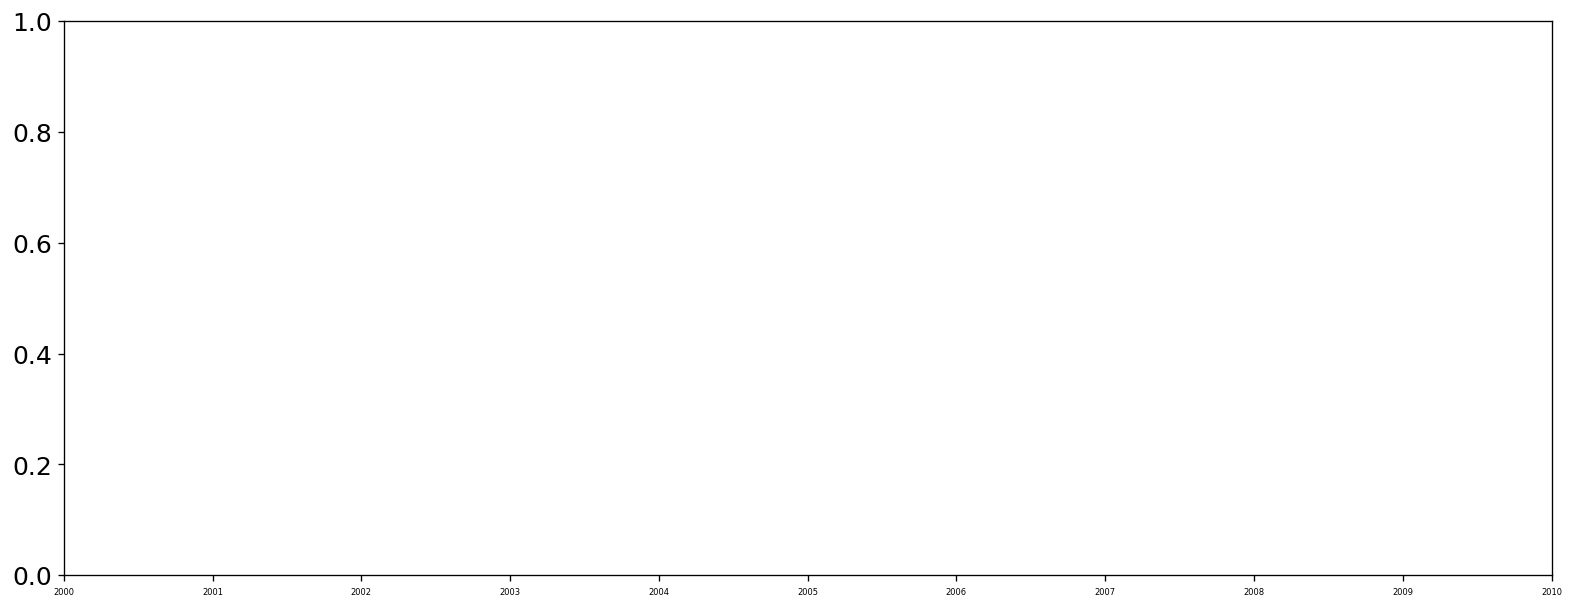

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(final_test_data['ds'], input_df['y'], color='blue',
         label='Actual {0}'.format('MMTSN'))
plt.plot(final_test_data['ds'], final_test_data['AutoARIMA'], color='red',
         label='Predicted {0}'.format('MMTSN'))
plt.xlabel('Time', fontsize = 20)
plt.ylabel('MMTSN', fontsize = 20)
plt.title("{0} over Time using ARIMA".format('MMTSN'), fontsize = 20)
plt.legend()
plt.show()

## Evaluation

In [ ]:
arima_mae_auto = mean_absolute_error(final_test_data['y'],
                                final_test_data['AutoARIMA'])
print("MAE of AutoARIMA Statistical model = ", arima_mae_auto)
arima_rmse_auto =  mean_squared_error(final_test_data['y'],
                                 final_test_data['AutoARIMA']) ** 0.5
print("RMSE of AutoARIMA Statistical model = ", arima_rmse_auto)
#arima_r2_auto = r2_score(final_test_data['y'], final_test_data['AutoARIMA'])
#print("R^2 Score of ARIMA Statistical model = ", arima_r2_auto)
arima_mape_auto = 100*mean_absolute_percentage_error(final_test_data['y'],
                                                 final_test_data['AutoARIMA'])
print("MAPE Score of AutoARIMA Statistical model = {0} % ".
      format(arima_mape_auto))

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

## Residual Plots

In [ ]:
actual_arr_autoARIMA = np.array(final_test_data['y'])
predicted_arr_autoARIMA = np.array(final_test_data['AutoARIMA'])
residuals_autoARIMA = predicted_arr_autoARIMA - actual_arr_autoARIMA
plt.scatter(final_test_data['ds'], residuals_autoARIMA)
plt.axhline(y=0, color = 'black')
plt.title("Differences between Acutal and Predicted Values for Auto ARIMA.",
          fontsize = 20)
plt.xlabel("Time", fontsize = 20)
plt.ylabel("Residual", fontsize = 20)
plt.show()